IMDB Collection Download. We are limited to 10000 words.

In [2]:
import matplotlib.pyplot as plt
import keras
from keras import models
from keras import layers

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

Decoding reviews:


In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

We store the reviews in a binary matrix:

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Still determining the type of expected values:

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train[0]

1.0

##Model no 1.


We define the model:

In [13]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [14]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [16]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 71ms/step - loss: 0.6247 - acc: 0.6788 - val_loss: 0.5594 - val_acc: 0.7565
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5245 - acc: 0.8121 - val_loss: 0.5157 - val_acc: 0.8447
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4786 - acc: 0.8630 - val_loss: 0.4931 - val_acc: 0.8669
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4478 - acc: 0.8924 - val_loss: 0.4875 - val_acc: 0.8272
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4243 - acc: 0.9086 - val_loss: 0.4664 - val_acc: 0.8686
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4038 - acc: 0.9225 - val_loss: 0.4584 - val_acc: 0.8754
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3862 - acc: 0.9346 - val_loss: 0.4659 - val_acc: 0.8531
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3704 - a

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

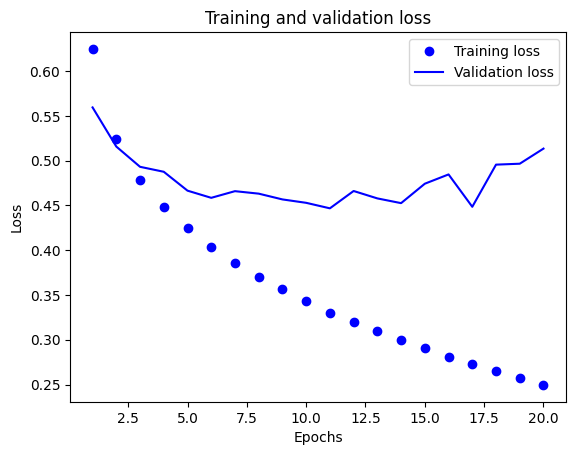

In [18]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

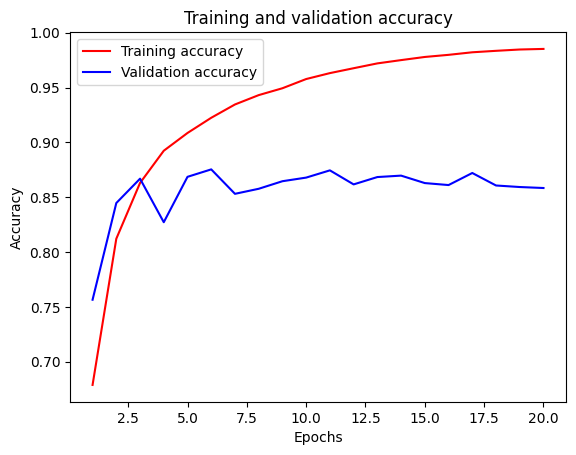

In [19]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Model no 2.


We define the model:

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [21]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [23]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5111 - acc: 0.7755 - val_loss: 0.3856 - val_acc: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3185 - acc: 0.8916 - val_loss: 0.3095 - val_acc: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2382 - acc: 0.9214 - val_loss: 0.2823 - val_acc: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1887 - acc: 0.9383 - val_loss: 0.2738 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1580 - acc: 0.9499 - val_loss: 0.2904 - val_acc: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1342 - acc: 0.9578 - val_loss: 0.2855 - val_acc: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1156 - acc: 0.9643 - val_loss: 0.3058 - val_acc: 0.8804
Epoch 8/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0978 - a

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

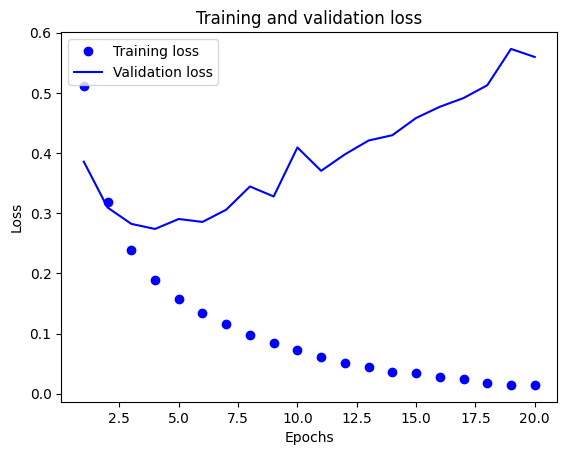

In [25]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

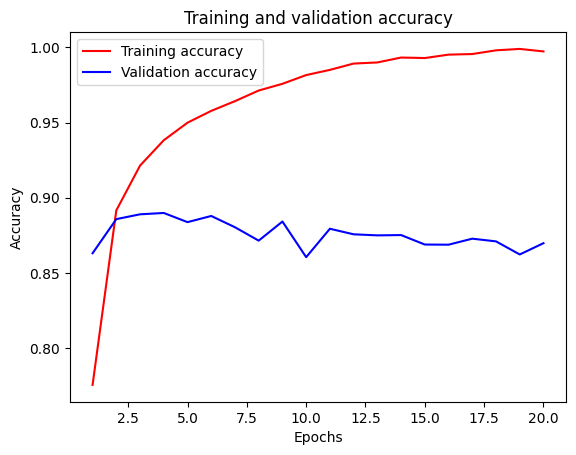

In [26]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Model no 3.


We define the model:

In [27]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [28]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [30]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 87ms/step - loss: 0.6477 - acc: 0.6452 - val_loss: 0.6048 - val_acc: 0.6331
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5616 - acc: 0.7757 - val_loss: 0.5517 - val_acc: 0.7175
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5101 - acc: 0.8303 - val_loss: 0.5116 - val_acc: 0.8058
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4731 - acc: 0.8673 - val_loss: 0.4912 - val_acc: 0.8277
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4453 - acc: 0.8894 - val_loss: 0.4729 - val_acc: 0.8703
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4225 - acc: 0.9075 - val_loss: 0.4656 - val_acc: 0.8553
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4032 - acc: 0.9206 - val_loss: 0.4591 - val_acc: 0.8579
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3857 - a

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

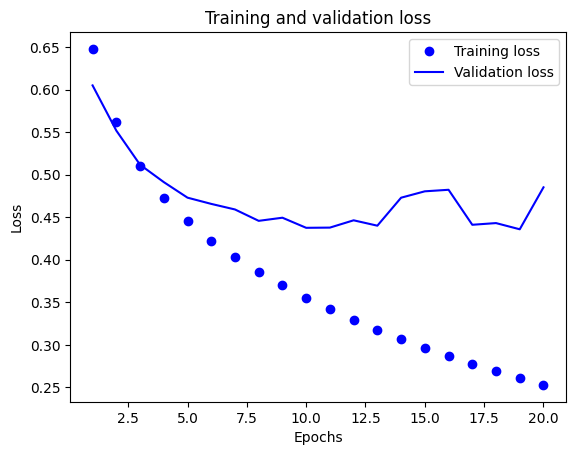

In [32]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

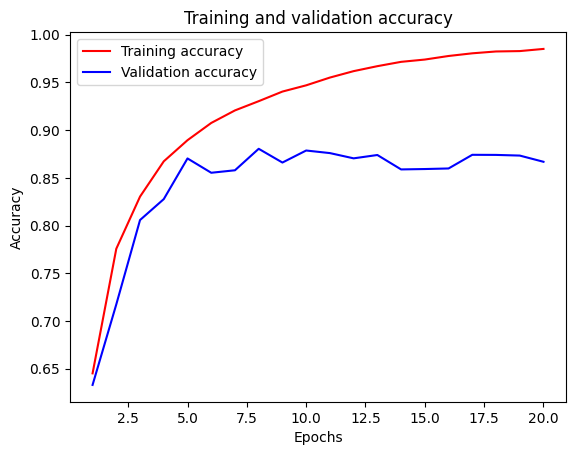

In [33]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Model no 4.


We define the model:

In [34]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [35]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [36]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [37]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 119ms/step - loss: 0.5942 - acc: 0.7443 - val_loss: 0.4822 - val_acc: 0.8555
Epoch 2/20
30/30 [==============================] - 2s 50ms/step - loss: 0.3908 - acc: 0.8851 - val_loss: 0.3540 - val_acc: 0.8722
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2799 - acc: 0.9113 - val_loss: 0.2997 - val_acc: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2203 - acc: 0.9281 - val_loss: 0.2799 - val_acc: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1793 - acc: 0.9430 - val_loss: 0.2782 - val_acc: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1513 - acc: 0.9533 - val_loss: 0.2799 - val_acc: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1266 - acc: 0.9620 - val_loss: 0.2923 - val_acc: 0.8858
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1094 - 

In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

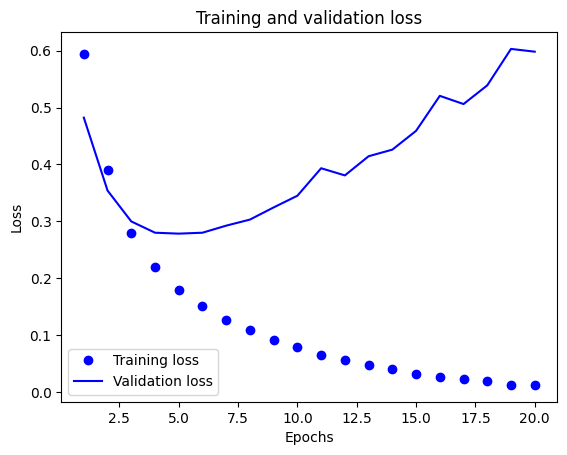

In [39]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

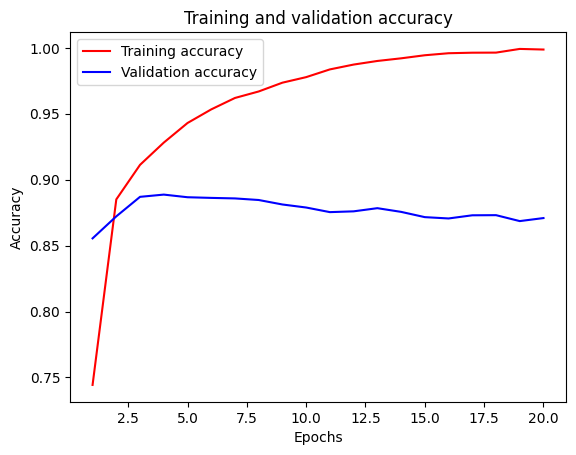

In [40]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Model no 5 EXTRA


We define the model:

In [41]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [42]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [43]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [44]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 70ms/step - loss: 0.6594 - acc: 0.6088 - val_loss: 0.6181 - val_acc: 0.8140
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6024 - acc: 0.6732 - val_loss: 0.5601 - val_acc: 0.8473
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5602 - acc: 0.6920 - val_loss: 0.5131 - val_acc: 0.8593
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5254 - acc: 0.7064 - val_loss: 0.4747 - val_acc: 0.8668
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4969 - acc: 0.7179 - val_loss: 0.4363 - val_acc: 0.8760
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4773 - acc: 0.7280 - val_loss: 0.4220 - val_acc: 0.8778
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4456 - acc: 0.7875 - val_loss: 0.3836 - val_acc: 0.8817
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4219 - a

In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

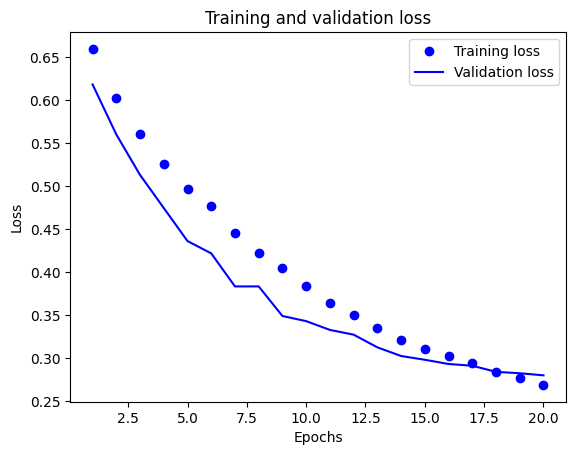

In [46]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

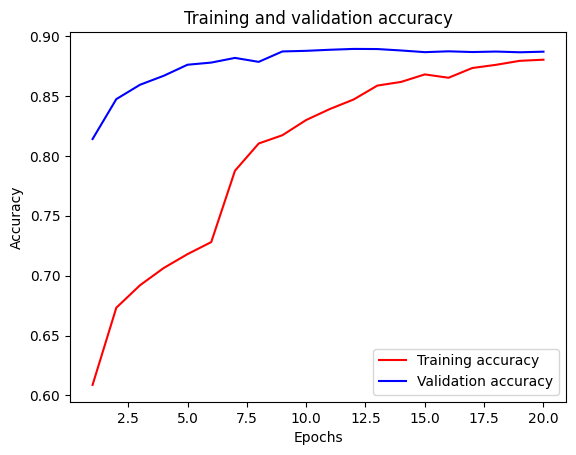

In [47]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Number of epochs 10

We define the model:

In [48]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [49]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [50]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [51]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 73ms/step - loss: 0.6462 - acc: 0.6404 - val_loss: 0.5954 - val_acc: 0.7649
Epoch 2/10
30/30 [==============================] - 1s 23ms/step - loss: 0.5702 - acc: 0.7839 - val_loss: 0.5371 - val_acc: 0.8027
Epoch 3/10
30/30 [==============================] - 1s 23ms/step - loss: 0.5221 - acc: 0.8375 - val_loss: 0.4992 - val_acc: 0.8418
Epoch 4/10
30/30 [==============================] - 1s 24ms/step - loss: 0.4830 - acc: 0.8671 - val_loss: 0.4708 - val_acc: 0.8485
Epoch 5/10
30/30 [==============================] - 1s 23ms/step - loss: 0.4509 - acc: 0.8879 - val_loss: 0.4496 - val_acc: 0.8610
Epoch 6/10
30/30 [==============================] - 1s 26ms/step - loss: 0.4226 - acc: 0.9006 - val_loss: 0.4312 - val_acc: 0.8809
Epoch 7/10
30/30 [==============================] - 1s 23ms/step - loss: 0.3981 - acc: 0.9115 - val_loss: 0.4194 - val_acc: 0.8738
Epoch 8/10
30/30 [==============================] - 1s 25ms/step - loss: 0.3722 - a

In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

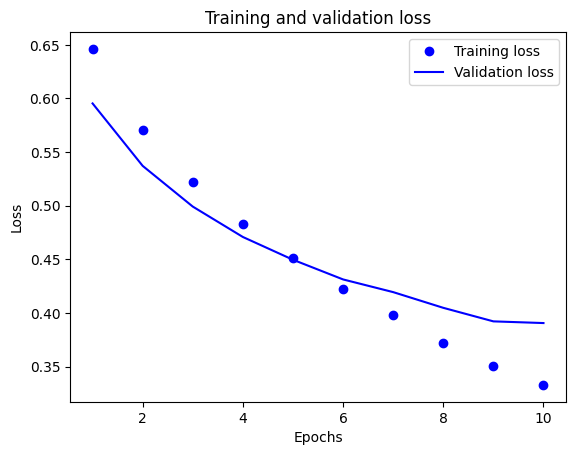

In [53]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

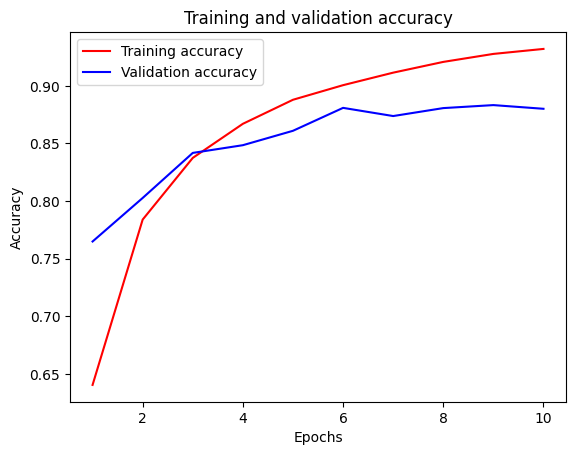

In [54]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Number of epochs 15

We define the model:

In [55]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [56]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [57]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [58]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=15,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 3s 71ms/step - loss: 0.6474 - acc: 0.6183 - val_loss: 0.6106 - val_acc: 0.7388
Epoch 2/15
30/30 [==============================] - 1s 25ms/step - loss: 0.5910 - acc: 0.7176 - val_loss: 0.5627 - val_acc: 0.7645
Epoch 3/15
30/30 [==============================] - 1s 26ms/step - loss: 0.5559 - acc: 0.7665 - val_loss: 0.5320 - val_acc: 0.7945
Epoch 4/15
30/30 [==============================] - 1s 22ms/step - loss: 0.5239 - acc: 0.8119 - val_loss: 0.5048 - val_acc: 0.8338
Epoch 5/15
30/30 [==============================] - 1s 24ms/step - loss: 0.4997 - acc: 0.8439 - val_loss: 0.4885 - val_acc: 0.8296
Epoch 6/15
30/30 [==============================] - 1s 23ms/step - loss: 0.4748 - acc: 0.8648 - val_loss: 0.4758 - val_acc: 0.8370
Epoch 7/15
30/30 [==============================] - 1s 25ms/step - loss: 0.4548 - acc: 0.8764 - val_loss: 0.4562 - val_acc: 0.8738
Epoch 8/15
30/30 [==============================] - 1s 26ms/step - loss: 0.4372 - a

In [59]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

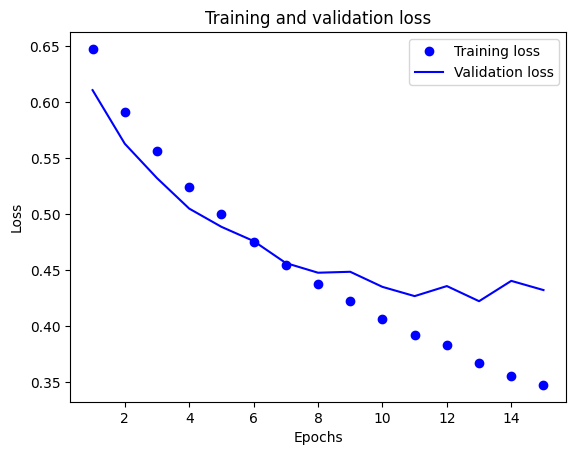

In [60]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

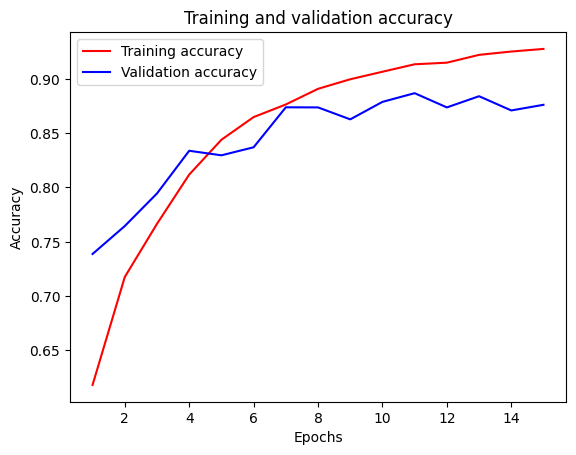

In [61]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Number of epochs 17


We define the model:

In [62]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [63]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [64]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [65]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=17,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/17
30/30 [==============================] - 3s 70ms/step - loss: 0.6439 - acc: 0.6215 - val_loss: 0.5806 - val_acc: 0.7408
Epoch 2/17
30/30 [==============================] - 1s 26ms/step - loss: 0.5747 - acc: 0.7572 - val_loss: 0.5403 - val_acc: 0.8177
Epoch 3/17
30/30 [==============================] - 1s 24ms/step - loss: 0.5320 - acc: 0.8137 - val_loss: 0.5106 - val_acc: 0.8201
Epoch 4/17
30/30 [==============================] - 1s 25ms/step - loss: 0.4998 - acc: 0.8443 - val_loss: 0.4928 - val_acc: 0.8259
Epoch 5/17
30/30 [==============================] - 1s 23ms/step - loss: 0.4756 - acc: 0.8624 - val_loss: 0.4738 - val_acc: 0.8698
Epoch 6/17
30/30 [==============================] - 1s 23ms/step - loss: 0.4538 - acc: 0.8803 - val_loss: 0.4646 - val_acc: 0.8599
Epoch 7/17
30/30 [==============================] - 1s 25ms/step - loss: 0.4380 - acc: 0.8903 - val_loss: 0.4541 - val_acc: 0.8786
Epoch 8/17
30/30 [==============================] - 1s 29ms/step - loss: 0.4229 - a

In [66]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

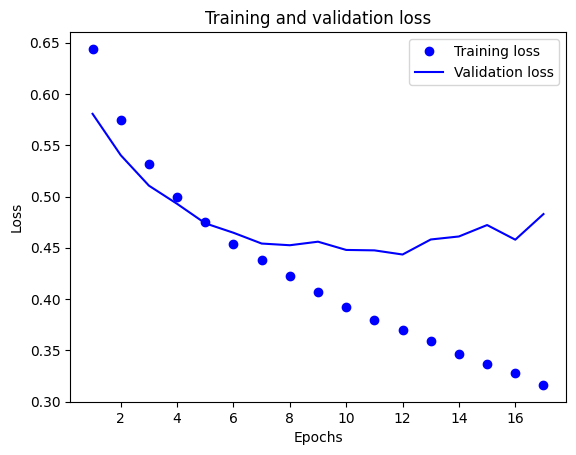

In [67]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

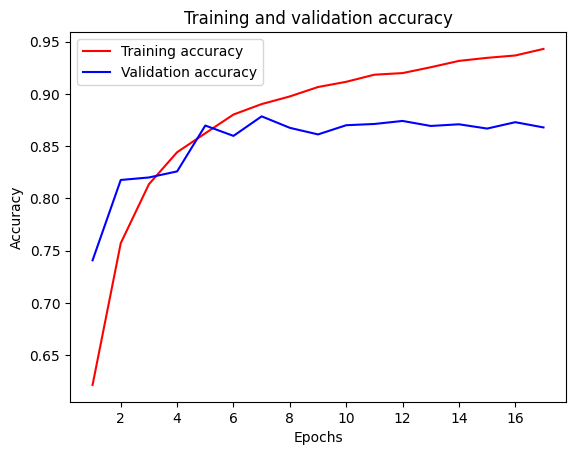

In [68]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Batch size 256

We define the model:

In [69]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [70]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [71]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [72]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=256,validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 4s 40ms/step - loss: 0.6499 - acc: 0.6100 - val_loss: 0.5847 - val_acc: 0.8409
Epoch 2/20
59/59 [==============================] - 1s 12ms/step - loss: 0.5678 - acc: 0.6793 - val_loss: 0.5062 - val_acc: 0.8670
Epoch 3/20
59/59 [==============================] - 1s 12ms/step - loss: 0.5135 - acc: 0.7055 - val_loss: 0.4463 - val_acc: 0.8772
Epoch 4/20
59/59 [==============================] - 1s 14ms/step - loss: 0.4705 - acc: 0.7226 - val_loss: 0.4207 - val_acc: 0.8765
Epoch 5/20
59/59 [==============================] - 1s 14ms/step - loss: 0.4433 - acc: 0.7339 - val_loss: 0.3835 - val_acc: 0.8869
Epoch 6/20
59/59 [==============================] - 1s 14ms/step - loss: 0.4185 - acc: 0.7459 - val_loss: 0.3455 - val_acc: 0.8874
Epoch 7/20
59/59 [==============================] - 1s 12ms/step - loss: 0.3990 - acc: 0.7649 - val_loss: 0.3278 - val_acc: 0.8891
Epoch 8/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3833 - a

In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

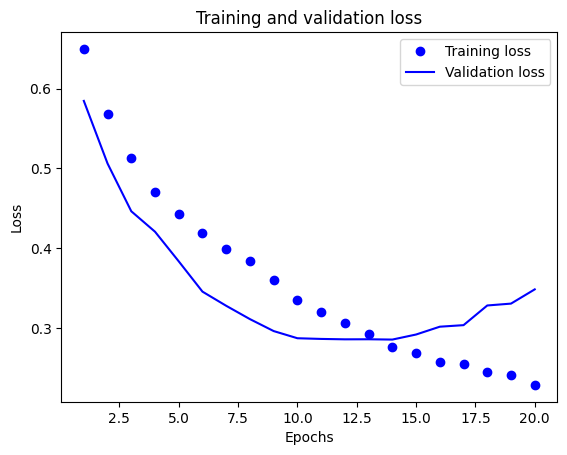

In [74]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

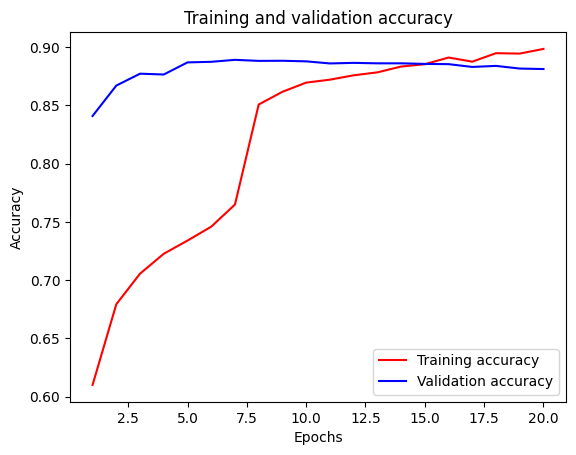

In [75]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Batch size 1024

We define the model:

In [11]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [12]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [14]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=1024,validation_data=(x_val, y_val))

Epoch 1/20
15/15 [==============================] - 9s 336ms/step - loss: 0.6681 - acc: 0.6020 - val_loss: 0.6155 - val_acc: 0.7305
Epoch 2/20
15/15 [==============================] - 1s 96ms/step - loss: 0.6085 - acc: 0.6874 - val_loss: 0.5509 - val_acc: 0.8408
Epoch 3/20
15/15 [==============================] - 1s 75ms/step - loss: 0.5681 - acc: 0.7149 - val_loss: 0.5075 - val_acc: 0.8447
Epoch 4/20
15/15 [==============================] - 1s 72ms/step - loss: 0.5366 - acc: 0.7429 - val_loss: 0.4714 - val_acc: 0.8621
Epoch 5/20
15/15 [==============================] - 1s 54ms/step - loss: 0.5082 - acc: 0.7708 - val_loss: 0.4467 - val_acc: 0.8611
Epoch 6/20
15/15 [==============================] - 1s 55ms/step - loss: 0.4857 - acc: 0.7895 - val_loss: 0.4191 - val_acc: 0.8712
Epoch 7/20
15/15 [==============================] - 1s 76ms/step - loss: 0.4631 - acc: 0.8030 - val_loss: 0.4035 - val_acc: 0.8703
Epoch 8/20
15/15 [==============================] - 1s 57ms/step - loss: 0.4446 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

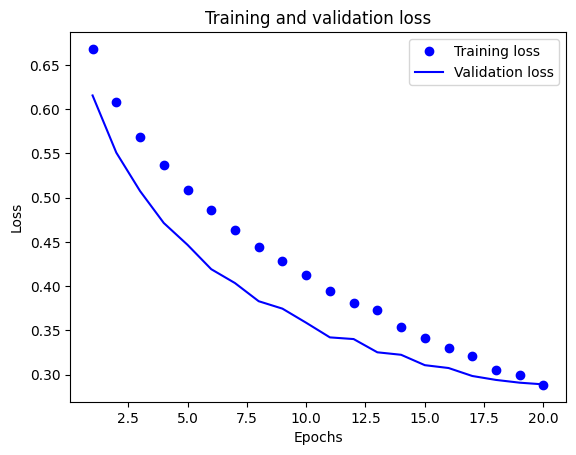

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

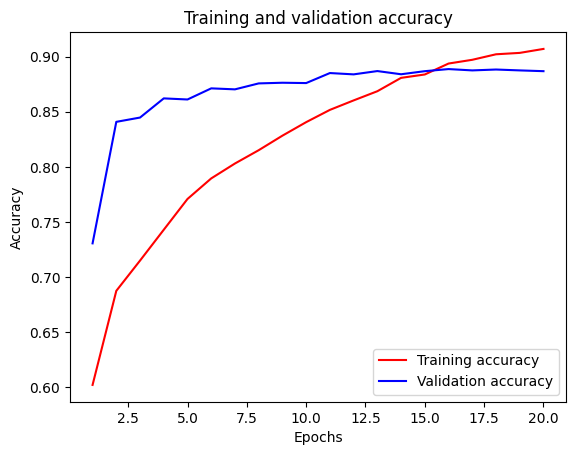

In [17]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Learning rate 0.0005

We define the model:

In [18]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [19]:
opt=keras.optimizers.RMSprop(learning_rate=0.0005)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [21]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.6656 - acc: 0.5919 - val_loss: 0.6407 - val_acc: 0.7261
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6088 - acc: 0.7225 - val_loss: 0.5901 - val_acc: 0.7652
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5621 - acc: 0.7903 - val_loss: 0.5493 - val_acc: 0.7689
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5231 - acc: 0.8295 - val_loss: 0.5191 - val_acc: 0.8408
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4925 - acc: 0.8580 - val_loss: 0.4943 - val_acc: 0.8420
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4653 - acc: 0.8769 - val_loss: 0.4780 - val_acc: 0.8284
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4458 - acc: 0.8890 - val_loss: 0.4565 - val_acc: 0.8659
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4262 - a

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

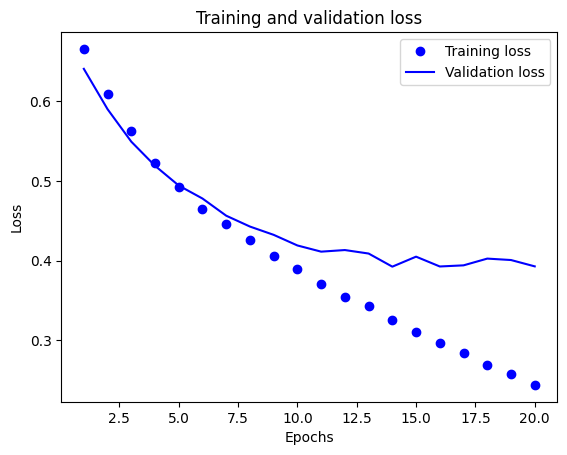

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

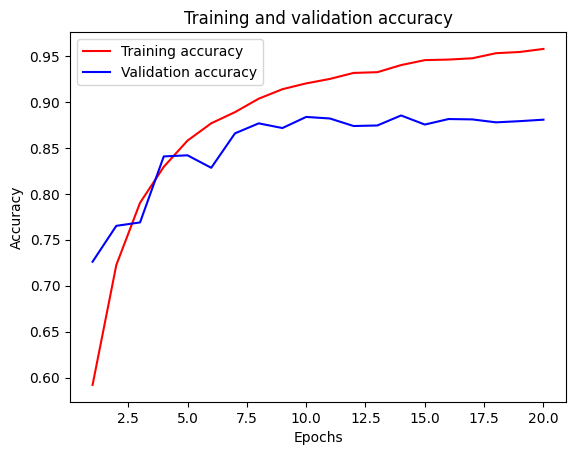

In [24]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Learning rate 0.002

We define the model:

In [25]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [26]:
opt=keras.optimizers.RMSprop(learning_rate=0.002)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We are training the model:

In [28]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 83ms/step - loss: 0.6502 - acc: 0.6283 - val_loss: 0.5878 - val_acc: 0.8251
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5613 - acc: 0.7368 - val_loss: 0.5120 - val_acc: 0.8635
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5060 - acc: 0.7656 - val_loss: 0.4682 - val_acc: 0.8738
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4523 - acc: 0.8064 - val_loss: 0.4264 - val_acc: 0.8791
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4121 - acc: 0.8378 - val_loss: 0.3956 - val_acc: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3801 - acc: 0.8545 - val_loss: 0.3690 - val_acc: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3479 - acc: 0.8735 - val_loss: 0.3457 - val_acc: 0.8848
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3238 - a

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

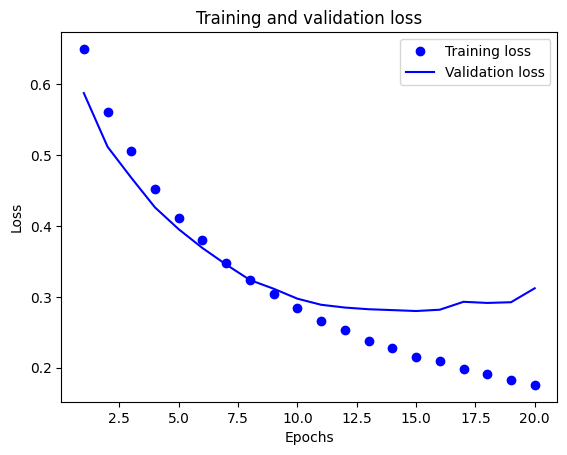

In [30]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

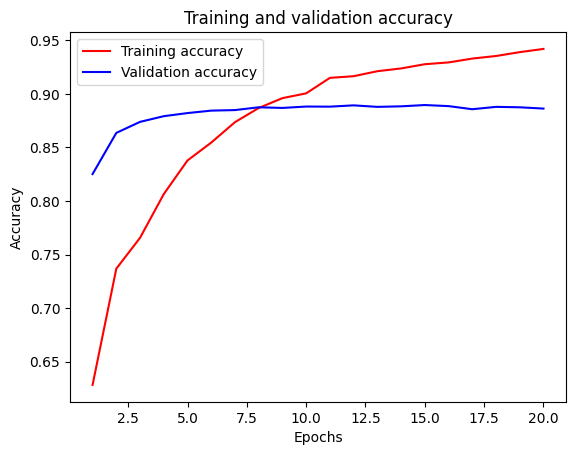

In [31]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Validation split 0.8

We define the model:

In [15]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [16]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [17]:
x_val = x_train[20000:]
partial_x_train = x_train[:20000]
y_val = y_train[20000:]
partial_y_train = y_train[:20000]

In [18]:
x_val.shape

(5000, 10000)

In [19]:
partial_x_train.shape

(20000, 10000)

We are training the model:

In [20]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
40/40 [==============================] - 5s 39ms/step - loss: 0.6253 - acc: 0.6536 - val_loss: 0.5679 - val_acc: 0.7210
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5414 - acc: 0.7893 - val_loss: 0.5268 - val_acc: 0.7412
Epoch 3/20
40/40 [==============================] - 1s 19ms/step - loss: 0.4990 - acc: 0.8431 - val_loss: 0.4936 - val_acc: 0.8472
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 0.4696 - acc: 0.8737 - val_loss: 0.4758 - val_acc: 0.8586
Epoch 5/20
40/40 [==============================] - 1s 24ms/step - loss: 0.4448 - acc: 0.8904 - val_loss: 0.4612 - val_acc: 0.8726
Epoch 6/20
40/40 [==============================] - 1s 24ms/step - loss: 0.4249 - acc: 0.9050 - val_loss: 0.4617 - val_acc: 0.8508
Epoch 7/20
40/40 [==============================] - 1s 23ms/step - loss: 0.4044 - acc: 0.9131 - val_loss: 0.4434 - val_acc: 0.8758
Epoch 8/20
40/40 [==============================] - 1s 20ms/step - loss: 0.3890 - a

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

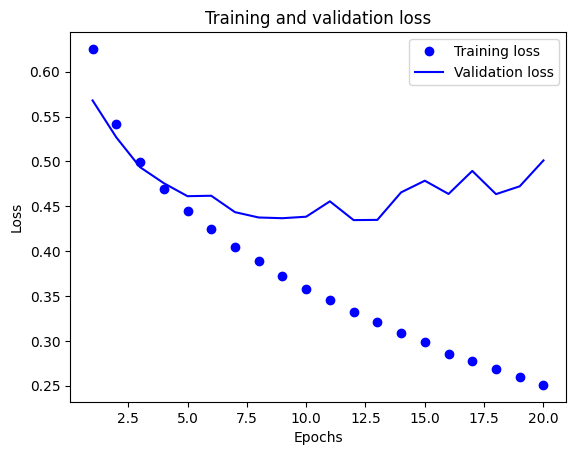

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

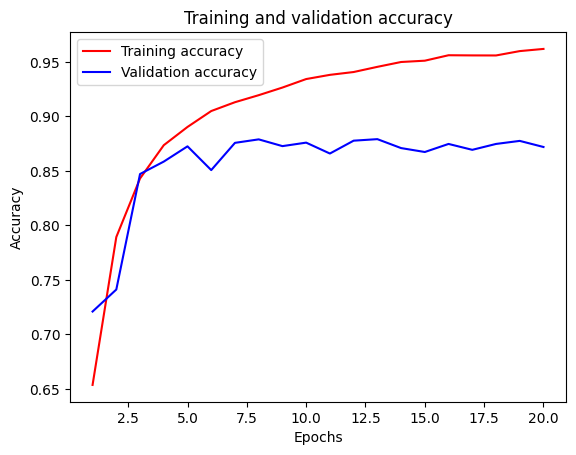

In [23]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Validation split 0.7

In [51]:
x_val.size

50000000

In [52]:
partial_x_train.size

200000000

In [53]:
x_val.shape

(5000, 10000)

In [54]:
partial_x_train.shape

(20000, 10000)

We define the model:

In [55]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [56]:
opt=keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [57]:
x_val = x_train[17500:]
partial_x_train = x_train[:17500]
y_val = y_train[17500:]
partial_y_train = y_train[:17500]

In [58]:
x_val.shape

(7500, 10000)

In [59]:
partial_x_train.shape

(17500, 10000)

We are training the model:

In [60]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
35/35 [==============================] - 3s 53ms/step - loss: 0.6555 - acc: 0.6132 - val_loss: 0.6181 - val_acc: 0.6411
Epoch 2/20
35/35 [==============================] - 1s 28ms/step - loss: 0.5935 - acc: 0.7191 - val_loss: 0.5651 - val_acc: 0.8455
Epoch 3/20
35/35 [==============================] - 1s 28ms/step - loss: 0.5491 - acc: 0.7746 - val_loss: 0.5208 - val_acc: 0.8603
Epoch 4/20
35/35 [==============================] - 1s 26ms/step - loss: 0.5105 - acc: 0.8026 - val_loss: 0.4834 - val_acc: 0.8711
Epoch 5/20
35/35 [==============================] - 1s 23ms/step - loss: 0.4722 - acc: 0.8237 - val_loss: 0.4406 - val_acc: 0.8841
Epoch 6/20
35/35 [==============================] - 1s 20ms/step - loss: 0.4380 - acc: 0.8350 - val_loss: 0.4053 - val_acc: 0.8863
Epoch 7/20
35/35 [==============================] - 1s 24ms/step - loss: 0.4048 - acc: 0.8410 - val_loss: 0.3752 - val_acc: 0.8891
Epoch 8/20
35/35 [==============================] - 1s 20ms/step - loss: 0.3747 - a

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

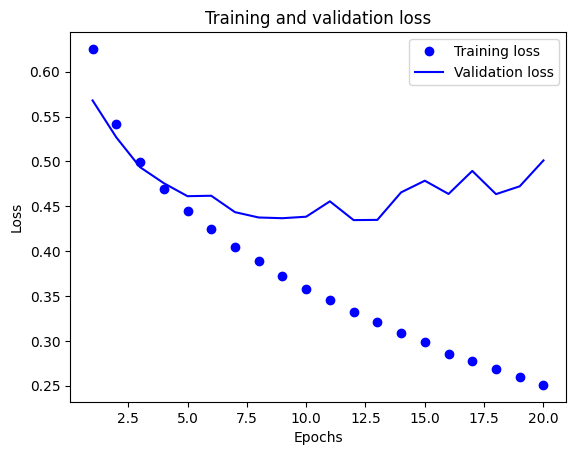

In [25]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

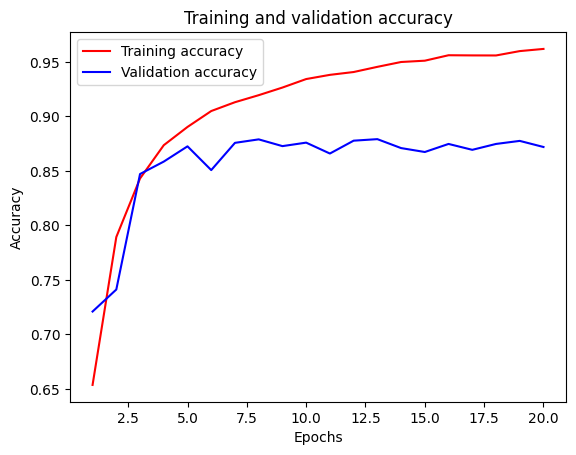

In [26]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Best model

In [40]:
x_val.size

50000000

In [41]:
partial_x_train.size

200000000

In [42]:
x_val.shape

(5000, 10000)

In [43]:
partial_x_train.shape

(20000, 10000)

We define the model:

In [44]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and model compilation:

In [45]:
opt=keras.optimizers.RMSprop(learning_rate=0.002)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

We create validation data from some of the training data:

In [46]:
x_val = x_train[20000:]
partial_x_train = x_train[:20000]
y_val = y_train[20000:]
partial_y_train = y_train[:20000]

In [47]:
x_val.shape

(5000, 10000)

In [48]:
partial_x_train.shape

(20000, 10000)

We are training the model:

In [49]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=16,batch_size=1024,validation_data=(x_val, y_val))

Epoch 1/16
20/20 [==============================] - 4s 110ms/step - loss: 0.6692 - acc: 0.5806 - val_loss: 0.6459 - val_acc: 0.5966
Epoch 2/16
20/20 [==============================] - 1s 48ms/step - loss: 0.6228 - acc: 0.6895 - val_loss: 0.6118 - val_acc: 0.7814
Epoch 3/16
20/20 [==============================] - 1s 47ms/step - loss: 0.5880 - acc: 0.7491 - val_loss: 0.5753 - val_acc: 0.7670
Epoch 4/16
20/20 [==============================] - 1s 47ms/step - loss: 0.5604 - acc: 0.7827 - val_loss: 0.5482 - val_acc: 0.7782
Epoch 5/16
20/20 [==============================] - 1s 44ms/step - loss: 0.5336 - acc: 0.8124 - val_loss: 0.5242 - val_acc: 0.8154
Epoch 6/16
20/20 [==============================] - 1s 44ms/step - loss: 0.5128 - acc: 0.8316 - val_loss: 0.5054 - val_acc: 0.8362
Epoch 7/16
20/20 [==============================] - 1s 41ms/step - loss: 0.4934 - acc: 0.8514 - val_loss: 0.4892 - val_acc: 0.8556
Epoch 8/16
20/20 [==============================] - 1s 47ms/step - loss: 0.4777 - 

In [50]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Training and validation error:

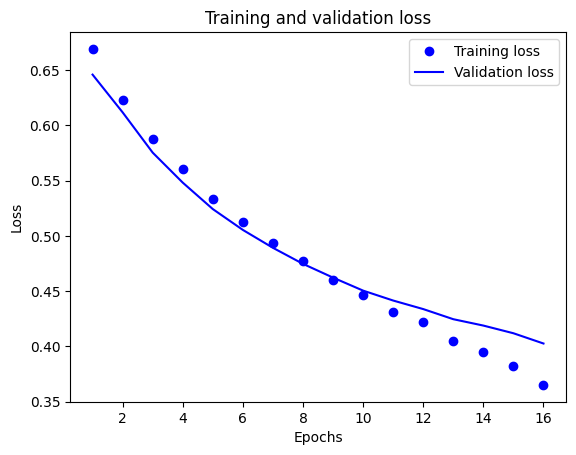

In [51]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

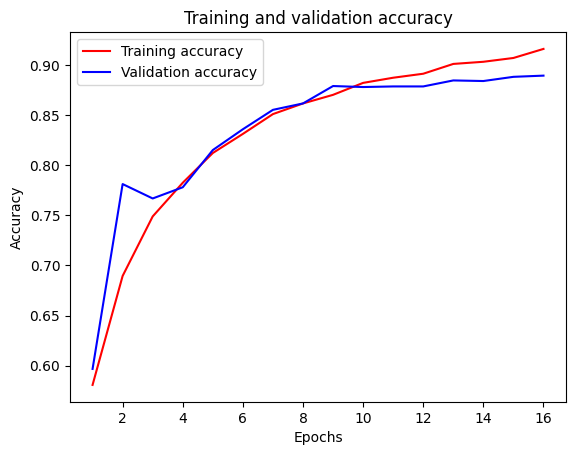

In [52]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()